In [1]:
import pandas as pd
df = pd.read_csv("car_Dekho_DA.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


1) From which manufacturing year to which manufacturing year vehicles are present in this data ?

In [ ]:
print("Vehicles are present from the year", df['Year'].min(), "to", df['Year'].max())

Vehicles are present from the year 2003 to 2018


2) What is the lowest price to which a vehicle is sold ?

In [ ]:
print("The lowest price a vehicle is sold at is", df['Selling_Price'].min())

The lowest price a vehicle is sold at is 0.1


 3) What is the highest price to which a vehicle is sold ?


In [ ]:
print("The highest price a vehicle is sold at is", df['Selling_Price'].max())

The highest price a vehicle is sold at is 35.0


4) How many records are there in this data ?


In [ ]:
print("The number of records in this dataset are", df.shape[0])

The number of records in this dataset are 301


5) Are there any missing records in this data ?

In [ ]:
print("The number of missing records in the dataset are", df.isnull().sum().sum())

The number of missing records in the dataset are 0


6) How many different vehicles are present in this data ?


In [ ]:
print("There are",df['Car_Name'].nunique(),"different cars present in the dataset.")

There are 98 different cars present in the dataset.


7) Which is the most sold vehicle in this data ?

In [ ]:
print(df['Car_Name'].value_counts().idxmax(), "is the most sold vehicle from the data.")

city is the most sold vehicle from the data.


8) Does the database include any CNG vehicle ? If yes how many of them are there ?


In [3]:
if df['Fuel_Type'].str.contains('CNG').any():
  print("Yes","there are", df['Fuel_Type'].str.contains('CNG').sum(),"CNG vehicles present.")
else:
  print("No")

Yes there are 2 CNG vehicles present.


9) How many vehicles here are for sale from Individuals directly ?

In [ ]:
print("There are", df['Seller_Type'][df['Seller_Type'] == 'Individual'].count(), "vehicles for sale from individuals directly.")

There are 106 vehicles for sale from individuals directly.


10) Does this database contain auto transmission vehicles ? If yes how many of them are there ?


In [7]:
df['Transmission'].str.contains('Automatic').any()
print("Yes","there are", df['Transmission'].str.contains('Automatic').sum(),"automatic transmission vehicles present.")

Yes there are 40 automatic transmission vehicles present.


<Axes: xlabel='Transmission'>

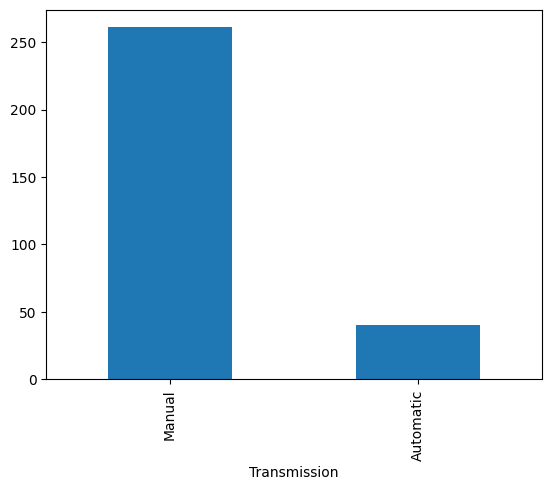

In [8]:
df.Transmission.value_counts().plot.bar()

11) How many single person owned vehicles are there in this database ?

In [ ]:
print("There are", df['Owner'][df['Owner'] == 0].count(), "single person owned vehicles present in the dataset.")

There are 290 single person owned vehicles present in the dataset.


12) Which is the most and least cost depreciated vehicle in data ?


In [ ]:
df['Depreciation'] = df['Present_Price'] - df['Selling_Price']
print("The most cost depreciated vehicle is", df['Car_Name'][df['Depreciation'] == df['Depreciation'].max()].values[0])
print("The least cost depreciated vehicle is", df['Car_Name'][df['Depreciation'] == df['Depreciation'].min()].values[0])

The most cost depreciated vehicle is land cruiser
The least cost depreciated vehicle is Honda Activa 4G


13) Which brands of vehicles are less affected by cost depreciation ?


In [ ]:
depreciation_by_brand = df.groupby('Car_Name')['Depreciation'].mean().sort_values()
print("The brands least affected by cost depreciation are:\n", depreciation_by_brand.head())

The brands least affected by cost depreciation are:
 Car_Name
TVS Sport             0.040
Honda Activa 4G       0.045
Hero Passion X pro    0.050
Bajaj Avenger 150     0.050
Honda Dream Yuga      0.060
Name: Depreciation, dtype: float64


14) Are there any factors which you feel affect the cost depreciation ?

In [ ]:
# corelation could be on of those factors that influence cost depreciation.
correlation = df[['Year', 'Kms_Driven', 'Depreciation']].corr()
print(correlation)

                  Year  Kms_Driven  Depreciation
Year          1.000000   -0.524342     -0.333746
Kms_Driven   -0.524342    1.000000      0.333832
Depreciation -0.333746    0.333832      1.000000


15) In general selling price is affected by age of vehicle and distance driven by vehicle , is it observable from data ?


In [ ]:
cor_price_age = df['Selling_Price'].corr(df['Year'])
print("Correlation between selling price and age of vehicle:", cor_price_age)
cor_price_distance = df['Selling_Price'].corr(df['Kms_Driven'])
print("Correlation between selling price and distance driven:", cor_price_distance)

Correlation between selling price and age of vehicle: 0.23614098016042737
Correlation between selling price and distance driven: 0.029187090674291236


16) Can we get idea about newest vehicles i.e. after 2014 manufactured ?


In [ ]:
new_vehicles = df[df['Year'] > 2014]
print("data on newest vehicles manufactured after 2014:")
print(new_vehicles)

data on newest vehicles manufactured after 2014:
          Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
2             ciaz  2017           7.25           9.85        6900    Petrol   
5    vitara brezza  2018           9.25           9.83        2071    Diesel   
6             ciaz  2015           6.75           8.12       18796    Petrol   
7          s cross  2015           6.50           8.61       33429    Diesel   
8             ciaz  2016           8.75           8.89       20273    Diesel   
..             ...   ...            ...            ...         ...       ...   
295           city  2015           8.55          13.09       60076    Diesel   
296           city  2016           9.50          11.60       33988    Diesel   
297           brio  2015           4.00           5.90       60000    Petrol   
299           city  2017          11.50          12.50        9000    Diesel   
300           brio  2016           5.30           5.90        5464    P

17) Can we find out data of only two wheelers from this data ?
Which is the oldest bike sold here?


In [9]:
two_wheelers = df[df["Present_Price"]<3.5]
print(two_wheelers.head())

                      Car_Name  Year  Selling_Price  Present_Price  \
23                    alto k10  2014           2.50           3.46   
37                         800  2003           0.35           2.28   
44                        omni  2012           1.25           2.69   
100  Royal Enfield Thunder 500  2016           1.75           1.90   
101         UM Renegade Mojave  2017           1.70           1.82   

     Kms_Driven Fuel_Type Seller_Type Transmission  Owner  
23        45280    Petrol      Dealer       Manual      0  
37       127000    Petrol  Individual       Manual      0  
44        50000    Petrol      Dealer       Manual      0  
100        3000    Petrol  Individual       Manual      0  
101        1400    Petrol  Individual       Manual      0  


In [10]:
two_wheelers.reset_index(drop=True,inplace=True)
two_wheelers.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,alto k10,2014,2.50,3.46,45280,Petrol,Dealer,Manual,0
1,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0
2,omni,2012,1.25,2.69,50000,Petrol,Dealer,Manual,0
3,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0
4,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0


In [12]:
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "alto k10"]
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "800"]
two_wheelers = two_wheelers.loc[two_wheelers.Car_Name != "omni"]
two_wheelers.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
3,Royal Enfield Thunder 500,2016,1.75,1.90,3000,Petrol,Individual,Manual,0
4,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0
5,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0
6,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0
7,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0


In [17]:
#the above process filterd out cars and two wheelers.
two_wheelers.loc[two_wheelers.Year == two_wheelers.Year.min()]
print("The oldest bike sold is:", two_wheelers.loc[two_wheelers['Year'].idxmin()])

The oldest bike sold is: Car_Name         Hero Super Splendor
Year                            2005
Selling_Price                    0.2
Present_Price                   0.57
Kms_Driven                     55000
Fuel_Type                     Petrol
Seller_Type               Individual
Transmission                  Manual
Owner                              0
Name: 89, dtype: object


18) Which is the newest bike sold here?


In [22]:
two_wheelers.loc[two_wheelers.Year == two_wheelers.Year.max()]
print("The newest bike sold is:", two_wheelers.loc[two_wheelers['Year'].idxmax()])
two_wheelers.loc[two_wheelers.Year == two_wheelers.Year.max()]

The newest bike sold is: Car_Name         UM Renegade Mojave
Year                           2017
Selling_Price                   1.7
Present_Price                  1.82
Kms_Driven                     1400
Fuel_Type                    Petrol
Seller_Type              Individual
Transmission                 Manual
Owner                             0
Name: 1, dtype: object


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
1,UM Renegade Mojave,2017,1.70,1.82,1400,Petrol,Individual,Manual,0
2,KTM RC200,2017,1.65,1.78,4000,Petrol,Individual,Manual,0
3,Bajaj Dominar 400,2017,1.45,1.60,1200,Petrol,Individual,Manual,0
4,Royal Enfield Classic 350,2017,1.35,1.47,4100,Petrol,Individual,Manual,0
9,Royal Enfield Classic 350,2017,1.20,1.47,11000,Petrol,Individual,Manual,0
26,Bajaj Avenger 220,2017,0.90,0.95,1300,Petrol,Individual,Manual,0
28,Honda CB Hornet 160R,2017,0.80,0.87,3000,Petrol,Individual,Manual,0
29,Yamaha FZ S V 2.0,2017,0.78,0.84,5000,Petrol,Individual,Manual,0
30,Honda CB Hornet 160R,2017,0.75,0.87,11000,Petrol,Individual,Manual,0
32,Bajaj Avenger 220,2017,0.75,0.95,3500,Petrol,Individual,Manual,0


19) Which is the most sold bike here?


In [20]:
print("The most sold bike is", two_wheelers['Car_Name'].value_counts().idxmax())

The most sold bike is Royal Enfield Classic 350


20) Do you find any deal in two wheelers which exceeded the general expectation ? Can you find a reason for it ?

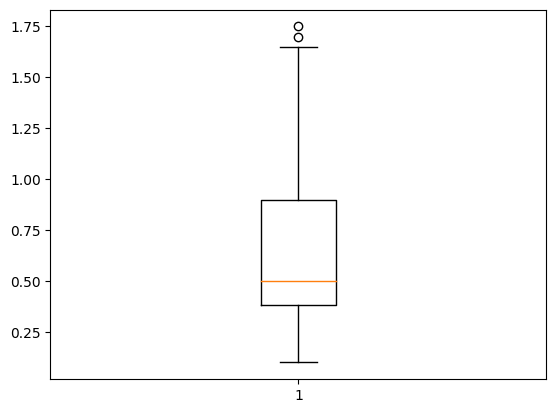

In [25]:
import matplotlib.pyplot as plt
plt.boxplot(two_wheelers.Selling_Price)
plt.show()
# Possible reasons for exceeding general expectation are
# Low kilometers driven
# Excellent condition
# High demand for that specific model

21) Can we find out data of only cars from this data ?

In [26]:
# Refined list of bike names identified from the dataset
bike_names = [
    'Royal Enfield Thunder 500', 'UM Renegade Mojave', 'KTM RC200',
    'Bajaj Dominar 400', 'Royal Enfield Classic 350', 'KTM RC390',
    'Hyosung GT250R', 'Royal Enfield Thunder 350', 'KTM 390 Duke',
    'Mahindra Mojo XT300', 'Bajaj Pulsar RS200', 'Royal Enfield Bullet 350',
    'Royal Enfield Classic 500', 'Bajaj Avenger 220', 'Bajaj Avenger 150',
    'Honda CB Hornet 160R', 'Yamaha FZ S V 2.0', 'Yamaha FZ 16',
    'TVS Apache RTR 160', 'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
    'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street', 'Yamaha FZ v 2.0',
    'Bajaj Pulsar NS 200', 'Bajaj Pulsar 220 F', 'TVS Apache RTR 180',
    'Hero Passion X pro', 'Bajaj Pulsar NS 200', 'Yamaha Fazer',
    'Honda Activa 4G', 'TVS Sport', 'Honda Dream Yuga', 'Bajaj Avenger Street 220',
    'Hero Splender iSmart', 'Activa 3g', 'Hero Passion Pro', 'Honda CB Trigger',
    'Yamaha FZ S', 'Bajaj Pulsar 135 LS', 'Activa 4g', 'Honda CB Unicorn',
    'Hero Honda CBZ extreme', 'Honda Karizma', 'Honda Activa 125', 'TVS Jupyter',
    'Hero Honda Passion Pro', 'Hero Splender Plus', 'Honda CB Shine',
    'Bajaj Discover 100', 'Suzuki Access 125', 'TVS Wego', 'Honda CB twister',
    'Hero Glamour', 'Hero Super Splendor', 'Bajaj Discover 125', 'Hero Hunk',
    'Hero Ignitor Disc', 'Hero CBZ Xtreme', 'Bajaj ct 100'
]
# Convert bike names to lowercase for comparison
bike_names_lower = [name.lower() for name in bike_names]
# Filter out bikes
cars = df[~df['Car_Name'].str.lower().isin(bike_names_lower)]
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


22) Which is the oldest car sold here?


In [27]:
oldest_car = cars.loc[cars['Year'].idxmin()]
print("The oldest car sold is:", oldest_car['Car_Name'], "from the year", oldest_car['Year'])

The oldest car sold is: 800 from the year 2003


23) Which is the newest car sold here?

In [28]:
newest_car = cars.loc[cars['Year'].idxmax()]
print("The newest car sold is:", newest_car['Car_Name'], "from the year", newest_car['Year'])

The newest car sold is: vitara brezza from the year 2018


24) Do you find any deal in cars which exceeded the general expectation ? Can you find a reason for it ?

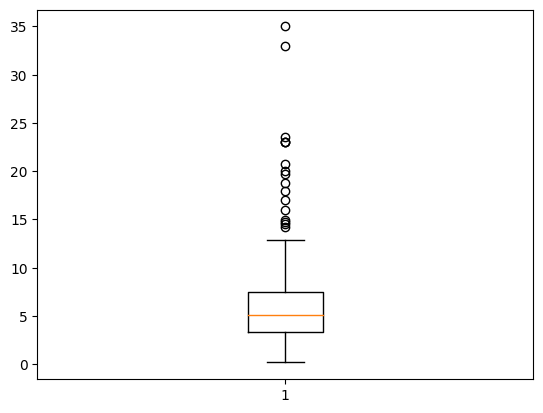

Cars sold significantly above average price:
           Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
1              sx4  2013           4.75           9.54       43000    Diesel   
18         wagon r  2015           3.25           5.09       35500       CNG   
22             sx4  2011           4.40           8.01       50000    Petrol   
27           swift  2017           6.00           6.49       16200    Petrol   
34           dzire  2014           5.50           8.06       45000    Diesel   
43           dzire  2014           5.50           8.06       45780    Diesel   
51        fortuner  2015          23.00          30.61       40000    Diesel   
52          innova  2017          18.00          19.77       15000    Diesel   
63        fortuner  2015          23.50          35.96       47000    Diesel   
64        fortuner  2017          33.00          36.23        6000    Diesel   
65      etios liva  2014           4.75           6.95       45000    Dies

In [30]:
import matplotlib.pyplot as plt
plt.boxplot(cars.Selling_Price)
plt.show()
# Possible reasons for exceeding general expectation:
# Low kilometers driven
# Excellent condition
# Recent price increases in the used car market
average_car_prices = cars.groupby('Car_Name')['Selling_Price'].mean()
outlier_cars = cars[cars.apply(lambda x: x['Selling_Price'] > 1.2 * average_car_prices[x['Car_Name']], axis=1)]
print("Cars sold significantly above average price:\n", outlier_cars)